<a href="https://colab.research.google.com/github/basel5621/depi-project/blob/main/Exploration_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Load dataset

In [ ]:
CSV_LINK = 'https://drive.google.com/uc?id=1ZegNftg4-WEhrihSgH8LloauAspwm1ti'    #get Sentiment 1.6 million tweets.csv from drive

In [ ]:
!gdown {CSV_LINK}

Downloading...
From (original): https://drive.google.com/uc?id=1ZegNftg4-WEhrihSgH8LloauAspwm1ti
From (redirected): https://drive.google.com/uc?id=1ZegNftg4-WEhrihSgH8LloauAspwm1ti&confirm=t&uuid=8e30000e-bc86-4805-b420-6043325fae3c
To: /content/Sentiment 1.6 million tweets.csv
100% 239M/239M [00:09<00:00, 25.0MB/s]


In [ ]:
COLUMNS_NAMES = ["label", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('Sentiment 1.6 million tweets.csv',encoding="ISO-8859-1" ,names = COLUMNS_NAMES)

In [ ]:
df.head()

,label,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Data Cleaning

## Check missing values and duplicates

In [ ]:
df.isna().sum()

,0
label,0
ids,0
date,0
flag,0
user,0
text,0


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1600000, 6)

## see the unique value of each column and thier number

In [ ]:
for col in df.columns:
  print(col,':',df[col].nunique(),'unique value')
  print('top five:')
  print(df[col].value_counts().nlargest(5))
  print('\n' + '*' * 20 + '\n')

label : 2 unique value
top five:
label
0    800000
4    800000
Name: count, dtype: int64

********************

ids : 1598315 unique value
top five:
ids
2190457769    2
1972193428    2
1989776729    2
1989776908    2
1564543229    2
Name: count, dtype: int64

********************

date : 774363 unique value
top five:
date
Mon Jun 15 12:53:14 PDT 2009    20
Fri May 29 13:40:04 PDT 2009    17
Fri May 22 05:10:17 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri Jun 05 14:13:07 PDT 2009    16
Name: count, dtype: int64

********************

flag : 1 unique value
top five:
flag
NO_QUERY    1600000
Name: count, dtype: int64

********************

user : 659775 unique value
top five:
user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
Name: count, dtype: int64

********************

text : 1581466 unique value
top five:
text
isPlayer Has Died! Sorry     210
good morning                 118
headache                     11

## drop unused features

In [ ]:
df.drop(['ids','flag','user'],axis=1,inplace=True)

In [ ]:
df['label'] = df['label'].replace({4:1})  # 0:'negative', 1:'positive'

## Examine Trends Over Time

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y')

In [ ]:
df.head()

,label,date,text
0,0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...
2,0,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...
3,0,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,0,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df['date'].dt.year.value_counts()

,count
date,
2009,1600000


In [ ]:
val_count=df['date'].dt.month.value_counts()
month_names={4:'April',5:'May',6:'June'}
val_count=val_count.rename(month_names)
val_count

,count
date,
June,923608
May,576367
April,100025


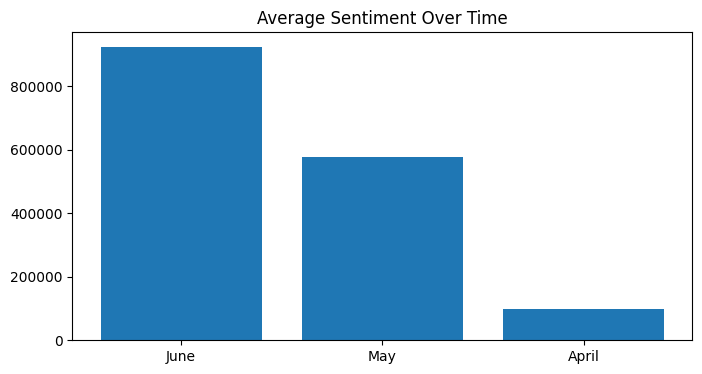

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Average Sentiment Over Time")
plt.show()

now we notice that data is collected in 2009 for three month (4,5,6)

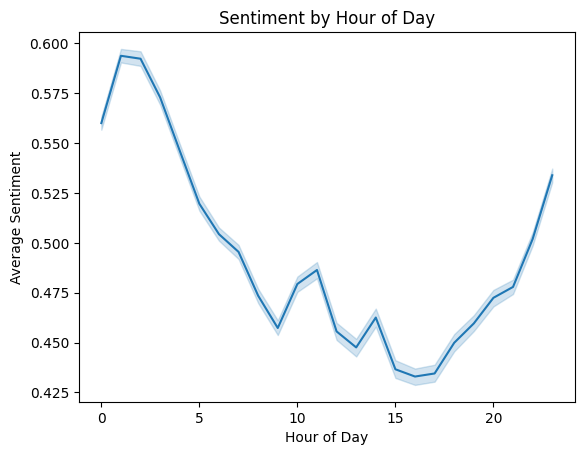

In [ ]:
df['hour'] = df['date'].dt.hour

sns.lineplot(x='hour', y='label', data=df)
plt.title('Sentiment by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sentiment')
plt.show()

## get URL and mentions (in case we need them)

In [ ]:
def extract_mentions(text):
    mentions = re.findall(r'@\w+', text)

    return mentions

df['mentions'] = df['text'].apply(extract_mentions)

In [ ]:
def extract_URLs(text):
    URLs = re.findall(r'http\S+', text)

    return URLs

df['URLs'] = df['text'].apply(extract_URLs)

In [ ]:
df.head(10)

,label,date,text,hour,mentions,URLs
0,0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",22,[@switchfoot],[http://twitpic.com/2y1zl]
1,0,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,22,[],[]
2,0,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,22,[@Kenichan],[]
3,0,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,22,[],[]
4,0,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",22,[@nationwideclass],[]
5,0,2009-04-06 22:20:00,@Kwesidei not the whole crew,22,[@Kwesidei],[]
6,0,2009-04-06 22:20:03,Need a hug,22,[],[]
7,0,2009-04-06 22:20:03,@LOLTrish hey long time no see! Yes.. Rains a...,22,[@LOLTrish],[]
8,0,2009-04-06 22:20:05,@Tatiana_K nope they didn't have it,22,[@Tatiana_K],[]
9,0,2009-04-06 22:20:09,@twittera que me muera ?,22,[@twittera],[]


# Data Preprocessing

In [ ]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)     # Remove mentions
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    tweet = tweet.lower()                  # Convert to lowercase
    return tweet

df['cleaned_text'] = df['text'].apply(clean_tweet)

In [ ]:
df.sample(5)

,label,date,text,hour,mentions,URLs,cleaned_text
543273,0,2009-06-16 19:16:38,@mindlesspursuit I'd join you in chat but you ...,19,[@mindlesspursuit],[],id join you in chat but you have to register ...
1284976,1,2009-06-02 03:07:45,"okay, off to sit out in the sun",3,[],[],okay off to sit out in the sun
72142,0,2009-05-04 01:19:52,Working Trying to figure this stuff out!,1,[],[],working trying to figure this stuff out
1142030,1,2009-05-30 20:30:56,// Lamesauce new YouTube video.,20,[],[],lamesauce new youtube video
2377,0,2009-04-07 01:13:01,I'm ill....i don't like that,1,[],[],im illi dont like that


In [ ]:

print(sample['text'])
print('\n' + '*' * 20 + '\n')
print(sample['cleaned_text'])

1108164    Had an awesome flying by the seat of our pants...
Name: text, dtype: object

********************

1108164    had an awesome flying by the seat of our pants...
Name: cleaned_text, dtype: object


In [ ]:
stop_words=stopwords.words('english')
stop_words.remove('not')
def pre_processing(text):
  token= word_tokenize(text)

  filtered_token= [word for word in token if word not in stop_words]

  lemmatizer= WordNetLemmatizer()
  filtered_token_after_lemm= [lemmatizer.lemmatize(word) for word in filtered_token]
  return ' '.join(filtered_token_after_lemm)

print("original:\t\t"+df['cleaned_text'][10])
print("after preprocessing:\t"+pre_processing(df['cleaned_text'][10]))

original:		spring break in plain city its snowing 
after preprocessing:	spring break plain city snowing


In [ ]:
df['cleaned_text']=df['cleaned_text'].apply(pre_processing)

## Show common word

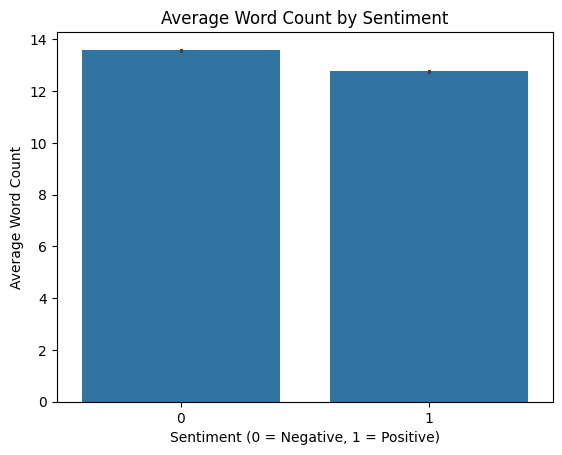

In [ ]:
# Add a new column for word count in each tweet
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Plot average word count by sentiment
sns.barplot(x='label', y='word_count', data=df)
plt.title('Average Word Count by Sentiment')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Average Word Count')
plt.show()

In [ ]:
from collections import Counter
# Tokenize tweets into words
all_words = nltk.word_tokenize(' '.join(df['cleaned_text']))

# Find the most common words
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
print(common_words)

[('im', 177515), ('not', 109055), ('day', 101288), ('good', 89514), ('get', 85817), ('like', 79065), ('go', 77406), ('got', 69685), ('u', 67052), ('love', 66996), ('dont', 66929), ('work', 66449), ('today', 66088), ('going', 64093), ('time', 63756), ('cant', 62607), ('back', 56107), ('one', 55872), ('lol', 55188), ('know', 53223)]


In [ ]:
from nltk import ngrams

positive_tweets = df[df['label'] == 1]['cleaned_text']
negative_tweets = df[df['label'] == 0]['cleaned_text']

# Define a function to get the top N bigrams
def get_top_ngrams(corpus, n=2, top_n=10):
    ngram_list = []
    for sentence in corpus:
        tokens = nltk.word_tokenize(sentence)
        ngrams_list = list(ngrams(tokens, n))
        ngram_list.extend(ngrams_list)

    ngram_freq = Counter(ngram_list)
    return ngram_freq.most_common(top_n)

# Get top bigrams in positive tweets
positive_bigrams = get_top_ngrams(positive_tweets, n=2)
print("Top Positive Bigrams:", positive_bigrams)

Top Positive Bigrams: [(('gon', 'na'), 10493), (('cant', 'wait'), 10253), (('good', 'morning'), 7985), (('last', 'night'), 4849), (('wan', 'na'), 4643), (('im', 'going'), 4596), (('im', 'not'), 3982), (('got', 'ta'), 3827), (('good', 'luck'), 3810), (('good', 'night'), 3609)]


In [ ]:
# Get top bigrams in negative tweets
negative_bigrams = get_top_ngrams(negative_tweets, n=2)
print("Top Negative Bigrams:", negative_bigrams)

## Generate Word Clouds

### positive word

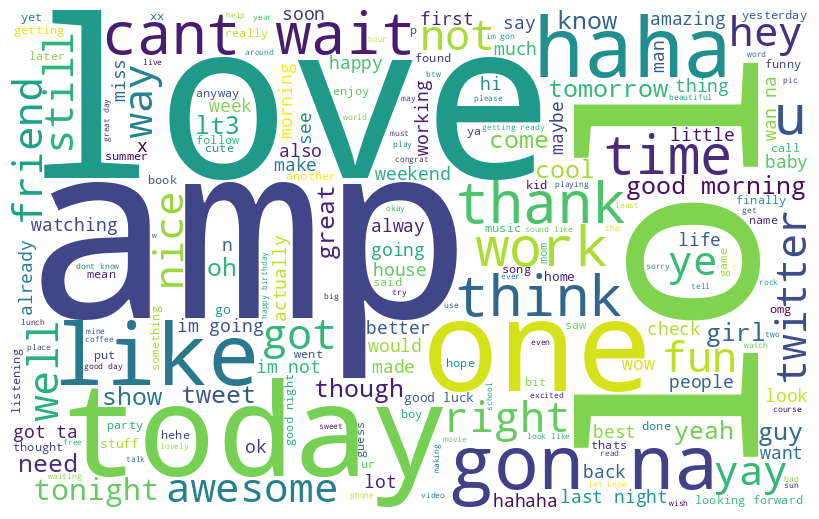

In [ ]:
from wordcloud import WordCloud
words_list = df[df['label']==1]['cleaned_text'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,background_color='white',
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 10), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### negative word

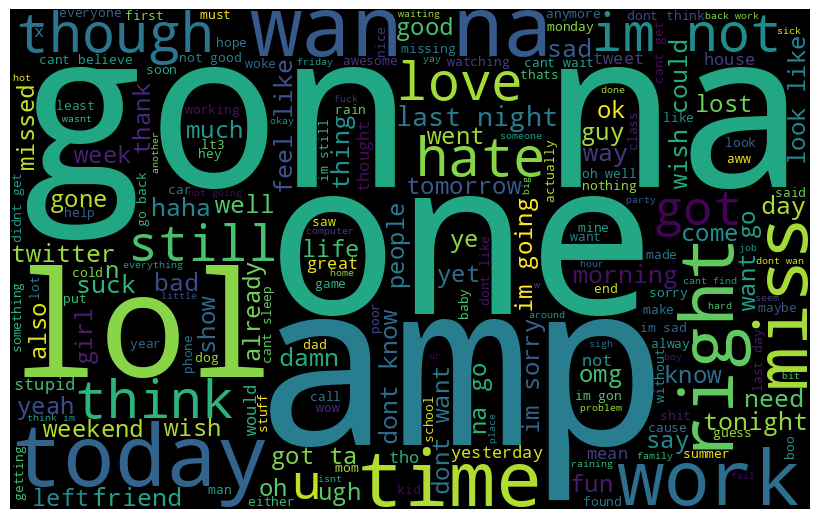

In [ ]:
from wordcloud import WordCloud
words_list = df[df['label']==0]['cleaned_text'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 10), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Prepare cleaned data ready for analysis

In [ ]:
trained_df = df[['cleaned_text','label']]

In [ ]:
trained_df.head()

,cleaned_text,label
0,awww thats bummer shoulda got david carr third...,0
1,upset cant update facebook texting might cry r...,0
2,dived many time ball managed save 50 rest go b...,0
3,whole body feel itchy like fire,0
4,not behaving im mad cant see,0


## Split the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test  = train_test_split(trained_df , test_size=0.1, random_state=7,shuffle=True)

print("Train data size ",df_train.shape[0])
print("Test data size ",df_test.shape[0])

Train data size  1440000
Test data size  160000


In [ ]:
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_train.head()

,cleaned_text,label
0,going another signing north cause live blackpo...,0
1,cowardly loser seek racism weapon not win,1
2,checking much talked twitter thanks jen,1
3,feel hot im kind getty coughy scratchy throat,0
4,yay emily twitter exciting hope summer going w...,1


In [ ]:
df_train.shape

(1440000, 2)

# save cleaned dataset

In [ ]:
df_train.to_csv('train.csv',index=False)

In [ ]:
df_test.to_csv('test.csv',index=False)